In [ ]:
lysis -

# **Suicide RISK Analysis - Module 3 Predictive Modeling using a Synthetic Dataset**



## Stages of the project

###This project is divided into two stages, as modules:

**Module 1. Data availability and suitability assessment**

**Module 2. Predictive Modeling using Machine Learning**

**Module 3. Predictive Modeling using a Synthethic Dataset**

## Research Questions

There are some research questions formulated for this research. In the following sections of this notebook, it will be asessed if it is possible to answer those questions with the dataset, or we need a different approach:

These comparisons will be based on data collection from people who committed suicide after being discharged from hospital.

1. Are there statistically significant differences in suicide risk between patients with various types of mental disorders, and can these differences be used to inform targeted intervention strategies?

2. What are the main factors, including demographic and clinical variables, that contribute to the risk of suicide within a year after discharge among patients diagnosed with mental disorders?

3. How do different features or indicators related to mental health, such as depression severity, treatment adherence, or follow-up care, impact the risk of suicide after discharge?

4. Can machine learning models effectively predict the risk of suicide among patients with specific mental disorders, and if so, which models perform best in this context?


# **Module 2. Predicting Values using Neural Networks**

###**Dependencies Installation**

In [ ]:
!pip install pandas
!pip install numpy
#!pip install numpy pandas (it does the same)
!pip install scikit-learn

In [ ]:
#[Write about what I am trying to do here]
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.1 MB/s eta 0:00:00


In [ ]:
#importing required libraries
import numpy as np
import pandas as pd                     # data processing, CSV file
# Set the number of max columns and rows that can be visualized:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import missingno as msno                  #Visualization of missing values

import matplotlib.pyplot as plt           #visualisation
%matplotlib inline

import seaborn as sns                     #visualisation
sns.set(color_codes=True)
sns.set(style = 'dark')                   #sns.set(style="darkgrid") also available



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#[Write about what I am trying to do here]
import os
import codecs
import scipy.stats as stats


In [ ]:
#[Write about what I am trying to do here]
import cv2

In [ ]:
#[Write about what I am trying to do here]
from matplotlib.texmanager import TemporaryDirectory
TemporaryDirectory

tempfile.TemporaryDirectory

In [ ]:
# Import Neural Networks libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

###**Observations:**

My data has categorical features and text values. And most ML models accept numeric inputs. This is the reason why I will manipulate these types of categories so that they are in the proper format accepted by the ML algorithms.



In [ ]:
#[ Write what I am trying to do here...?]
data['Result'] = data['Value'] - data['Valuee']

In [ ]:
map_dict = {
    'Suicide within 30 days after discharge among patients diagnosed with a mental disorder ':0,
    'Suicide within 1 year after discharge among patients diagnosed with a mental disorder': 1,
    'Excess mortality for patients diagnosed with bipolar disorder ': 2
            }

### **Encoding**

Here are four techniques for encoding or converting categorical characteristics into numbers. Here they are:

Mapping Method

- Ordinary Encoding

- Label Encoding

- Pandas Dummies

- OneHot Encoding

Note that some of these encoding techniques may produce the same output, the difference is just the implementation. The first 3 will produce the numeric outputs, while the last one will produce the hot matrix (with 1s and 0s).

**Categorical Encoding:**

For categorical variables, you need to encode them into numerical values because neural networks work with numerical data. Common encoding techniques include:

- One-Hot Encoding: This method creates binary columns for each category in a categorical variable. Each category is represented by a column, and the presence of the category is indicated by a 1 or 0. This is suitable for nominal data (categories without an inherent order).
- Label Encoding: Label encoding assigns a unique integer to each category. This is suitable for ordinal data (categories with a meaningful order). However, be cautious as neural networks might interpret the encoded integers as having ordinal meaning, which might not be accurate.

**Scaling Numerical Features:**

For numerical features, it's important to scale them, especially if they have different ranges. Scaling ensures that all features contribute equally to the model's learning process. Common scaling techniques include:

- Standardization (Z-score normalization): This scales the features to have a mean of 0 and a standard deviation of 1. It's appropriate when the data follows a normal distribution.
- Min-Max Scaling: This scales the features to a specific range, often between 0 and 1. It's suitable when you want to preserve the original range of values.

In our case, Data is already standardised

#### Ordinary Encoding

This will also convert categorical data into numbers. Let's implement it

In [ ]:
#Show me the features of the dataset
data_encoded = dataset.copy()
data_encoded.columns

Index(['Country', 'Periods', 'IND', 'Indicator', 'GEN', 'Gender', 'VAL',
       'Value', 'Valuee'],
      dtype='object')

In [ ]:
data_filtered =dataset [['Indicator', 'Gender', 'Value']]
data_filtered.head()

,Indicator,Gender,Value
0,Suicide within 1 year after discharge among pa...,Total,NaN
1,Suicide within 1 year after discharge among pa...,Total,NaN
2,Suicide within 1 year after discharge among pa...,Total,NaN
3,Suicide within 1 year after discharge among pa...,Total,NaN
4,Suicide within 1 year after discharge among pa...,Total,NaN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

data_codes = encoder.fit_transform(data_filtered)

data_codes

array([[ 2.,  2., nan],
       [ 2.,  2., nan],
       [ 2.,  2., nan],
       ...,
       [ 3.,  2., nan],
       [ 3.,  2., nan],
       [ 3.,  2., nan]])

In [ ]:
data_encoded[['Indicator', 'Gender', 'Value']] = pd.DataFrame(data_codes, columns=data_filtered.columns, index=data_filtered.index)
data_encoded.head()

<ipython-input-84-610e1cf18963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Indicator', 'Gender', 'Value']] = pd.DataFrame(data_encoded, columns=data_filtered.columns, index=data_filtered.index)


,Country,Periods,IND,Indicator,GEN,Gender,VAL,Value,Valuee
0,Czech Republic,2009,MORTSUMD,2.0,T,2.0,AS_STD_RATE_CPAT,NaN,0.30
1,Czech Republic,2009,MORTSUMD,2.0,T,2.0,LOW_CI,NaN,0.25
2,Czech Republic,2009,MORTSUMD,2.0,T,2.0,UP_CI,NaN,0.34
3,Czech Republic,2010,MORTSUMD,2.0,T,2.0,AS_STD_RATE_CPAT,NaN,0.29
4,Czech Republic,2010,MORTSUMD,2.0,T,2.0,LOW_CI,NaN,0.25


In [ ]:
data_encoded.Periods.value_counts()

2017    375
2016    375
2012    336
2013    336
2018    333
2014    321
2015    321
2019    315
2011    276
2020    261
2010    237
2009    207
2008    168
2021    156
2007    132
2006    129
2005    129
2004    105
2003    105
2002    105
2001    102
2000     96
2022     12
Name: Periods, dtype: int64

In [ ]:
data_encoded.Indicator.value_counts()

3.0    1974
2.0    1971
1.0     531
0.0     456
Name: Indicator, dtype: int64

In [ ]:
data_encoded.Gender.value_counts()

Total     1646
Male      1643
Female    1643
Name: Gender, dtype: int64

Series([], Name: Value, dtype: int64)

In [ ]:
#data_encoded.Valuee.value_counts()

In [ ]:
df.columns

Index(['Country', 'Periods', 'GEN', 'Gender', 'MORTSUMD AS_STD_RATE_CPAT',
       'MORTSUMD LOW_CI', 'MORTSUMD UP_CI', 'EXCESCHI AS_STD_RATIO',
       'EXCEBIPO AS_STD_RATIO', 'MORTSUMS AS_STD_RATE_CPAT', 'MORTSUMS LOW_CI',
       'MORTSUMS UP_CI'],
      dtype='object')

### Create Synthetic Dataset

The need of the synthetic dataset is to be able to test the models and methods without spending months gathering the required personal data that may be difficult because it is protected by privacy regulations.

In [ ]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:00


In [ ]:
# Import libraries to create data that is not available for gathering:
from faker import Faker
import datetime
import random
fake = Faker()

In [ ]:
# Define the number of rows for your dataset
num_rows = 1000

# Create empty lists to store data
patient_ids = []
ages = []
genders = []
diagnoses = []
severity_scores = []
depression_severity = []
diagnosis_dates = []
treatment_history = []
recent_discharge = []
follow_up_period = []
family_history = []
suicide_attempts = []
previous_suicide_attempts = []
lethal_means_access = []
substance_abuse_history = []
current_substance_abuse = []
loss_of_loved_one = []
hopelessness = []
chronic_pain_or_illness = []
medication_changes = []
bullying_discrimination = []
cultural_religious_beliefs = []
social_support = []
social_isolation = []
access_to_healthcare = []
access_to_mental_health_care = []
employment_status = []
financial_status = []
financial_stress = []
geographic_location = []
date_of_suicide = []
suicide_method = []

# Generate synthetic data
for _ in range(num_rows):
    patient_ids.append(fake.unique.random_number(digits=6))
    ages.append(random.randint(18, 80))
    genders.append(random.choice(["Male", "Female", "Non-binary"]))
    diagnoses.append(random.choice(["Depression", "Schizophrenia", "Bipolar Disorder", "Anxiety Disorder"]))
    severity_scores.append(random.uniform(1, 10))
    depression_severity.append(random.uniform(1, 10))
    diagnosis_dates.append(fake.date_of_birth(tzinfo=None, minimum_age=18, maximum_age=80))
    treatment_history.append(fake.paragraph(nb_sentences=3))
    recent_discharge.append(random.choice([True, False]))
    follow_up_period.append(random.randint(30, 365))
    family_history.append(random.choice(["Yes", "No", "Unknown"]))
    suicide_attempts.append(random.choice([True, False]))
    previous_suicide_attempts.append(random.choice([True, False]))
    lethal_means_access.append(random.choice(["Easy", "Limited", "None"]))
    substance_abuse_history.append(random.choice([True, False]))
    current_substance_abuse.append(random.choice([True, False]))
    loss_of_loved_one.append(random.choice([True, False]))
    hopelessness.append(random.choice([True, False]))
    chronic_pain_or_illness.append(random.choice([True, False]))
    medication_changes.append(random.choice([True, False]))
    bullying_discrimination.append(random.choice([True, False]))
    cultural_religious_beliefs.append(random.choice(["Christianity", "Islam", "Buddhism", "Other", "None"]))
    social_support.append(random.choice(["Strong", "Moderate", "Weak"]))
    social_isolation.append(random.choice([True, False]))
    access_to_healthcare.append(random.choice(["High", "Moderate", "Low"]))
    access_to_mental_health_care.append(random.choice(["High", "Moderate", "Low"]))
    employment_status.append(random.choice(["Employed", "Unemployed", "Disability"]))
    financial_status.append(random.randint(1000, 100000))
    financial_stress.append(random.choice([True, False]))
    geographic_location.append(fake.country(unique_countries))
    date_of_suicide.append(fake.date_between(start_date='-1y', end_date='today') if random.choice([True, False]) else None)
    suicide_method.append(random.choice(["Poisoning", "Hanging", "Firearm", "Other"]) if date_of_suicide[-1] is not None else None)


In [ ]:
# Create a DataFrame
data = {
    'Patient ID': patient_ids,
    'Age': ages,
    'Gender': genders,
    'Diagnosis': diagnoses,
    'Severity of Mental Disorder': severity_scores,
    'Depression Severity': depression_severity,
    'Date of Diagnosis': diagnosis_dates,
    'Treatment History': treatment_history,
    'Recent Discharge from Treatment': recent_discharge,
    'Follow-up Period': follow_up_period,
    'Family History': family_history,
    'Suicide Attempts': suicide_attempts,
    'Previous Suicide Attempts': previous_suicide_attempts,
    'Access to Lethal Means': lethal_means_access,
    'History of Substance Abuse': substance_abuse_history,
    'Current Co-occurring Substance Abuse': current_substance_abuse,
    'Loss of a Loved One': loss_of_loved_one,
    'Hopelessness': hopelessness,
    'Chronic Pain or Illness': chronic_pain_or_illness,
    'Medication Changes': medication_changes,
    'Bullying and Discrimination': bullying_discrimination,
    'Cultural and Religious Beliefs': cultural_religious_beliefs,
    'Social Support': social_support,
    'Social Isolation': social_isolation,
    'Access to Healthcare': access_to_healthcare,
    'Access to Mental Health Care': access_to_mental_health_care,
    'Employment Status': employment_status,
    'Financial Status': financial_status,
    'Financial Stress': financial_stress,
    'Geographic Location': geographic_location,
    'Date of Suicide': date_of_suicide,
    'Suicide Method': suicide_method
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('HEALTH_SU_Prop_Assess.csv', index=False)

In [ ]:
df.head()

,Patient ID,Age,Gender,Diagnosis,Severity of Mental Disorder,Depression Severity,Date of Diagnosis,Treatment History,Recent Discharge from Treatment,Follow-up Period,Family History,Suicide Attempts,Previous Suicide Attempts,Access to Lethal Means,History of Substance Abuse,Current Co-occurring Substance Abuse,Loss of a Loved One,Hopelessness,Chronic Pain or Illness,Medication Changes,Bullying and Discrimination,Cultural and Religious Beliefs,Social Support,Social Isolation,Access to Healthcare,Access to Mental Health Care,Employment Status,Financial Status,Financial Stress,Geographic Location,Date of Suicide,Suicide Method
0,866817,55,Female,Anxiety Disorder,2.832263,9.829339,1975-12-02,Nor west although plant. Prepare court herself...,False,318,Yes,True,False,Easy,True,True,False,True,True,False,True,None,Weak,False,Low,Moderate,Unemployed,13878,True,Malta,None,None
1,472236,52,Non-binary,Schizophrenia,7.183491,9.855203,1995-12-13,Democrat speak television help perhaps. Talk t...,True,72,Yes,False,True,Easy,True,False,False,True,True,False,False,Christianity,Strong,False,High,Low,Disability,45436,False,India,2023-05-22,Poisoning
2,671034,74,Non-binary,Schizophrenia,4.269384,8.470018,1951-07-26,Level large friend house senior rather. Them l...,False,235,Yes,True,True,Limited,False,False,False,True,True,False,True,Buddhism,Strong,False,Low,Low,Disability,26249,False,Niger,2023-06-03,Firearm
3,37661,27,Non-binary,Bipolar Disorder,8.403408,3.865586,1991-04-18,Want past group protect end or speech. Might m...,False,248,Unknown,False,False,Limited,True,False,False,True,True,True,True,Other,Weak,False,Low,Moderate,Disability,99138,True,Saint Martin,2022-11-06,Other
4,510863,38,Non-binary,Schizophrenia,9.583748,9.537349,1951-08-01,Weight responsibility back sister. Same should...,False,148,Yes,False,False,Limited,True,False,True,False,False,True,True,None,Weak,True,High,Low,Employed,63550,True,Micronesia,2023-02-20,Firearm


##**Create Multi-Output Regression Model**

Importanting Data

In [ ]:
import pandas as pd
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def get_dataset():
  # Create sample data with sklearn make_regression function
  X, y = make_regression(n_samples=1000, n_features=10, n_informative=7, n_targets=5, random_state=0)

  # Convert the data into Pandas Dataframes for easier maniplution and keeping stored column names
  # Create feature column names
  feature_cols = ['feature_01', 'feature_02', 'feature_03', 'feature_04',
                  'feature_05', 'feature_06', 'feature_07', 'feature_08',
                  'feature_09', 'feature_10']

  df_features = pd.DataFrame(data = X, columns = feature_cols)

  # Create lable column names and dataframe
  label_cols = ['labels_01', 'labels_02', 'labels_03', 'labels_04', 'labels_05']

  df_labels = pd.DataFrame(data = y, columns = label_cols)

  return df_features, df_labels

###**Create Model**

Create a Tensorflow/Keras Sequential model

In [ ]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
    model.compile(loss='mae', optimizer='adam')
    return model

###**Train Model**

In [ ]:
# Create the datasets
X, y = get_dataset()

# Get the number of inputs and outputs from the dataset
n_inputs, n_outputs = X.shape[1], y.shape[1]


Load the model with function

In [ ]:
model = get_model(n_inputs, n_outputs)

Train the model

In [ ]:
model.fit(X, y, verbose=0, epochs=100)

Get model evaluation metrics to confirm training went well

In [ ]:
model.evaluate(x = X, y = y)

32/32 [==============================] - 1s 8ms/step - loss: 12.4505


12.450495719909668

###**Model Prediction**

In [ ]:
model.predict(X.iloc[0:1,:])

1/1 [==============================] - 0s 189ms/step


array([[  19.08239,  -70.461  ,  -69.65382,  -73.25507, -122.72762]],
      dtype=float32)

###**Get SHAP Values and Plots**

In [ ]:
!pip install shap
import shap

# print the JS visualization code to the notebook
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.9 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Here I take the Keras model trained above and explain why it makes different predictions on individual samples

In [ ]:
explainer = shap.KernelExplainer(model = model.predict, data = X.head(50), link = "identity")

2/2 [==============================] - 0s 13ms/step


Get the Shapley value

In [ ]:
# Set the index of the specific example to explain
X_idx = 0

shap_value_single = explainer.shap_values(X = X.iloc[X_idx:X_idx+1,:], nsamples = 100)

  0%|          | 0/1 [00:00<?, ?it/s]

157/157 [==============================] - 0s 3ms/step


Display the details

In [ ]:
X.iloc[X_idx:X_idx+1,:]

,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10
0,-0.093555,0.417854,-1.655827,-2.048833,-0.258209,-0.989744,-0.154596,-0.338294,1.503827,-0.514878


Choosing the label/output/destination to run individual explanations

In [ ]:
import ipywidgets as widgets

In [ ]:
# Create the list of all labels for the drop down list
list_of_labels = y.columns.to_list()

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label

Dropdown(description='Select Label:', options=(('labels_01', 0), ('labels_02', 1), ('labels_03', 2), ('labels_…

Plot the force plot for a single example and a single label/output/target

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current label Shown: {list_of_labels[current_label.value]}')

shap.force_plot(base_value = explainer.expected_value[current_label.value],
                shap_values = shap_value_single[current_label.value],
                features = X.iloc[X_idx:X_idx+1,:]
                )

Current label Shown: labels_01


Create the summary plot for a specific output/label/target

In [ ]:
# Note: I are limiting to the first 50 training examples since it takes time to calculate the full number of sampels
shap_values = explainer.shap_values(X = X.iloc[0:50,:], nsamples = 100)

  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 0s 1ms/step


Current Label Shown: labels_01



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


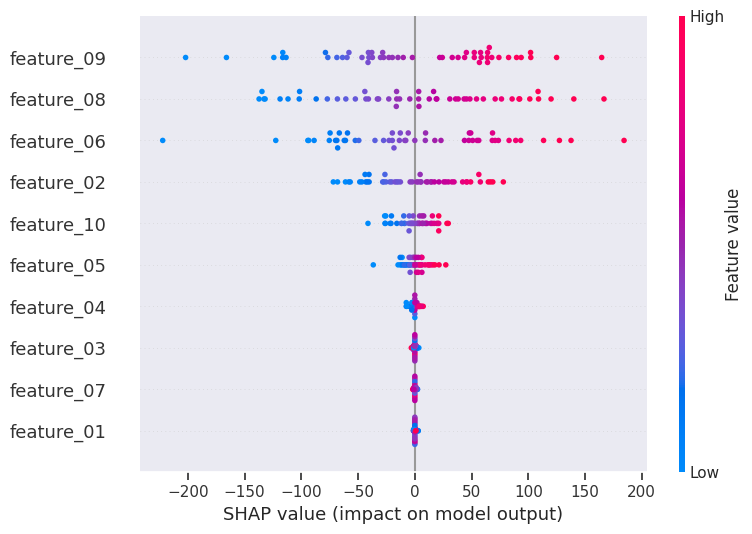

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values[current_label.value],
                  features = X.iloc[0:50,:]
                  )

Looking at the summary graph above, we can see that features 01, 07,03 and 04 are the features that have no influence on the model and can be discarded (note that in the data configuration we chose 10 features and only 6 of them had a significant impact) . Then we can see which features are actually influencing our model.

In [ ]:
print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

# print the JS visualization code to the notebook
shap.initjs()

shap.force_plot(base_value = explainer.expected_value[current_label.value],
                shap_values = shap_values[current_label.value],
                features = X.iloc[0:50,:])

Current Label Shown: labels_01



## **Sentiment Analysis with Logistic Regression**

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import shap
np.random.seed(101)
shap.initjs()

In [ ]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

In [ ]:


model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      2426
        True       0.85      0.85      0.85      2574

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [ ]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


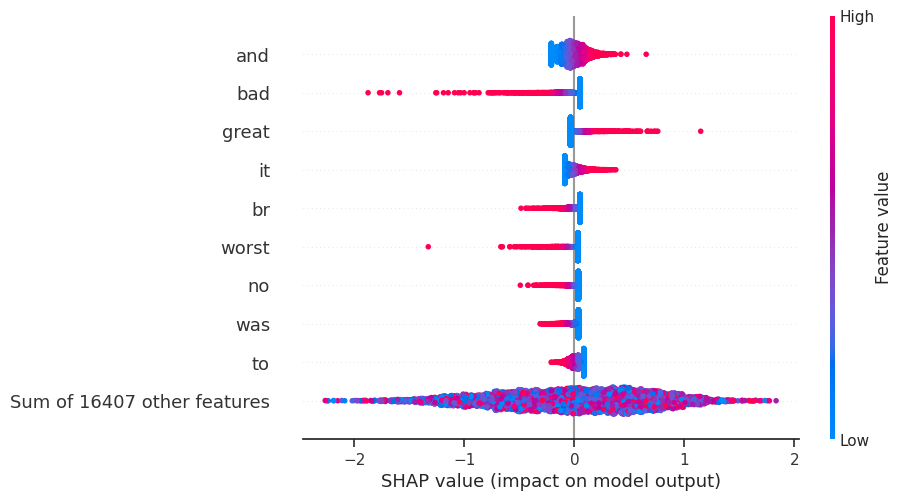

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
ind = 0
shap.plots.force(shap_values[ind])

In [ ]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
"Twelve Monkeys" is odd and disturbing, yet being so clever and intelligent at the same time. It cleverly jumps between future and the past, and the story it tells is about a man named James Cole, a convict, who is sent back to the past to gather information about a man-made virus that wiped out 5 billion of the human population on the planet back in 1996. At first Cole is sent back to the year 1990 by accident and by misfortune he is taken to a mental institution where he tries to explain his purpose and where he meets a psychiatrist Dr. Kathryn Railly who tries to help him and a patient named Jeffrey Goines, the insane son of a famous scientist. Being provocative and somehow so sensible, dealing with and between reason and madness, the movie is a definite masterpiece in the history of science-fiction films.<br /><br />The story is just fantastic. It's so original and so entertaining. The screenplay itself written by David and Janet Peoples is inspired by a movie name

In [ ]:
ind = 1
shap.plots.force(shap_values[ind])

In [ ]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Negative Review:
I don't understand the positive comments made about this film. It is cheap and nasty on all levels and I cannot understand how it ever got made.<br /><br />Cartoon characters abound - Sue's foul-mouthed, alcoholic, layabout, Irish father being a prime example. None of the characters are remotely sympathetic - except, briefly, for Sue's Asian boyfriend but even he then turns out to be capable of domestic violence! As desperately unattractive as they both are, I've no idea why either Rita and/or Sue would throw themselves at a consummate creep like Bob - but given that they do, why should I be expected to care what happens to them? So many reviews keep carping on about how "realistic" it is. If that is true, it is a sad reflection on society but no reason to put it on film.<br /><br />I didn't like the film at all.



In [ ]:
ind = 2
shap.plots.force(shap_values[ind])

In [ ]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
I finally saw this film tonight after renting it at Blockbuster (VHS). I have to agree that it is wildly original. Yes, maybe the characters were not fully realized but it isn't one of those movies. Rather, we are treated to the director's eye, his vision of what the story is about. And it does not stop. And to be honest, I didn't want it to. I do believe that Sabu had to have influenced the director's of 'Lock, Stock & Two Smoking Barrels' and 'Run, Lola, Run'. But I absolutely loved the way the three leads SEE the beautiful woman on the street to distract them momentarily. I really need to see this director's other work because this film really intrigued me. If you want insight, culture, sturm und drang, go somewhere else. If you want a laugh, camera movement and criminal hilarity, look here.



## **Build a linear model that uses standardized features**


A linear model that uses standardized features is a statistical model in which the independent variables (features) have been transformed or standardized to have a mean of 0 and a standard deviation of 1. Standardization involves subtracting the mean value of each feature from all data points and then dividing by the standard deviation. This process ensures that all features have the same scale and allows the linear model to give equal importance to each feature during training. Standardization is often performed to improve the performance and interpretability of linear models, such as linear regression.

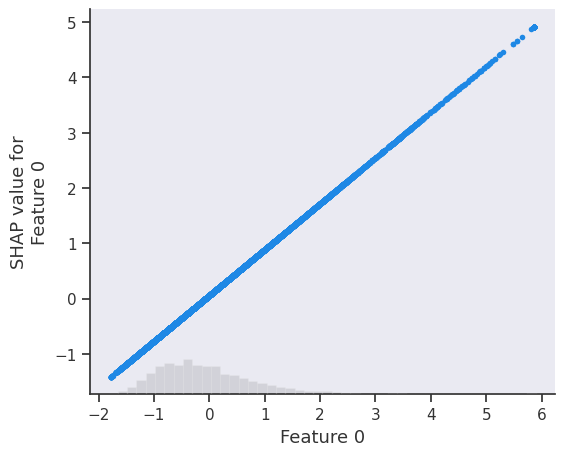

In [ ]:
import sklearn
import shap

# get standardized data
X, y = shap.datasets.california()
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# train the linear model
model = sklearn.linear_model.LinearRegression().fit(X_std, y)

# explain the model's predictions using SHAP
explainer = shap.explainers.Linear(model, X_std)
shap_values = explainer(X_std)

# visualize the model's dependence on the first feature
shap.plots.scatter(shap_values[:, 0])

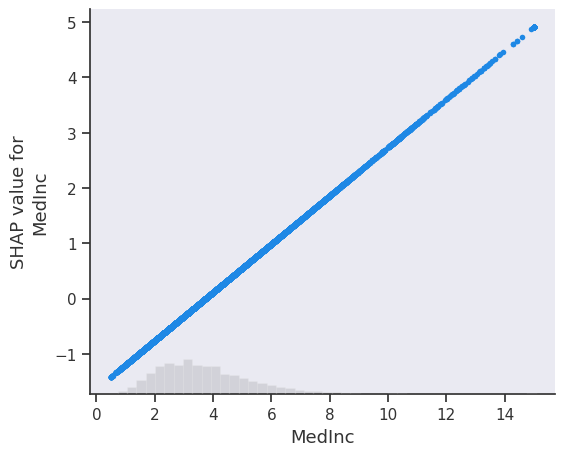

In [ ]:
# we add back the feature names stripped by the StandardScaler
for i,c in enumerate(X.columns):
    shap_values.feature_names[i] = c

# we convert back to the original data
# (note we can do this because X_std is a set of univariate transformations of X)
shap_values.data = X.values

# visualize the model's dependence on the first feature again, now in the new original feature space
shap.plots.scatter(shap_values[:, 0])

## **Permutation Explainer**

A Permutation Explainer is an interpretability technique used in machine learning to explain the importance or impact of individual features on a model's predictions. It works by systematically permuting (shuffling) the values of a specific feature while keeping other features constant and observing how the model's predictions change. The extent to which the predictions are affected by the permutation of a feature indicates its importance: if the predictions change significantly, the feature is considered important, while minimal change suggests lower importance. Permutation explainers are often used for feature importance analysis and model interpretation.







Demonstrating how to use the permutation explainer on a dataset and simple classification model

In [ ]:
import xgboost

import shap

# get a dataset on income prediction
X, y = shap.datasets.adult()

# train an XGBoost model (but any other model type would also work)
model = xgboost.XGBClassifier()
model.fit(X, y);

Tabular data with independent (Shapley value)

In [ ]:
# build a Permutation explainer and explain the model predictions on the given dataset
explainer = shap.explainers.Permutation(model.predict_proba, X)
shap_values = explainer(X[:100])

# get just the explanations for the positive class
shap_values = shap_values[..., 1]

Permutation explainer: 101it [00:17,  2.81it/s]


Plot a global summary

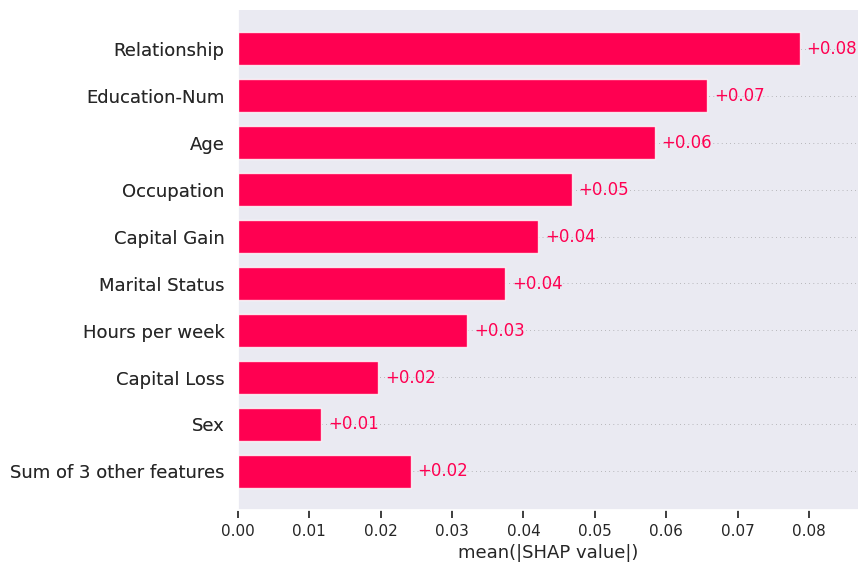

In [ ]:
shap.plots.bar(shap_values)

Plot a single instance

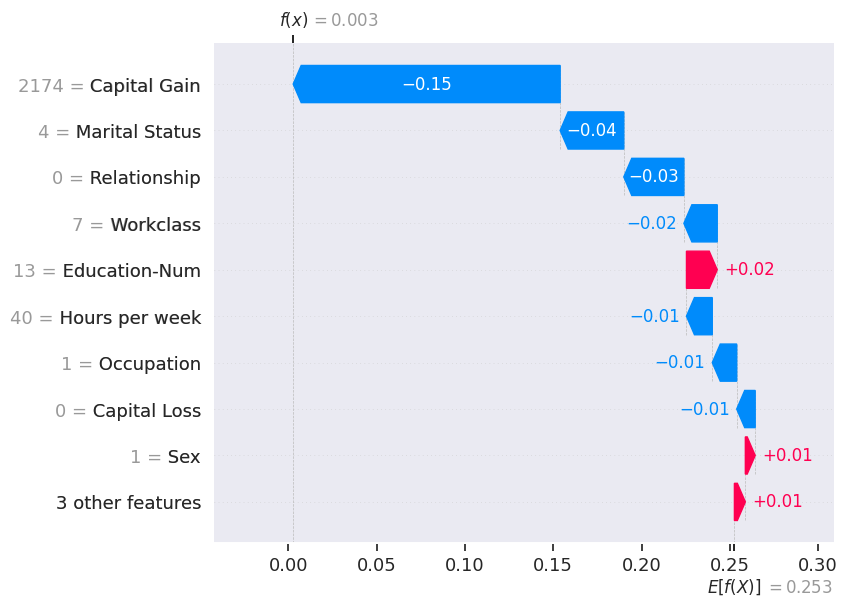

In [ ]:
shap.plots.waterfall(shap_values[0])

Tabular data with partition (Owen value) masking

Tabular data with partition (Owen value) masking is a method used to protect sensitive information in structured datasets by dividing the data into partitions and adding noise to the values within each partition, balancing data analysis and privacy.

In [ ]:
# build a clustering of the features based on shared information about y
clustering = shap.utils.hclust(X, y)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Plot a global summary

In [ ]:
# above we implicitly used shap.maskers.Independent by passing a raw dataframe as the masker
# now we explicitly use a Partition masker that uses the clustering we just computed
masker = shap.maskers.Partition(X, clustering=clustering)

# build a Permutation explainer and explain the model predictions on the given dataset
explainer = shap.explainers.Permutation(model.predict_proba, masker)
shap_values2 = explainer(X[:100])

# get just the explanations for the positive class
shap_values2 = shap_values2[..., 1]

Permutation explainer: 101it [00:16,  2.16it/s]


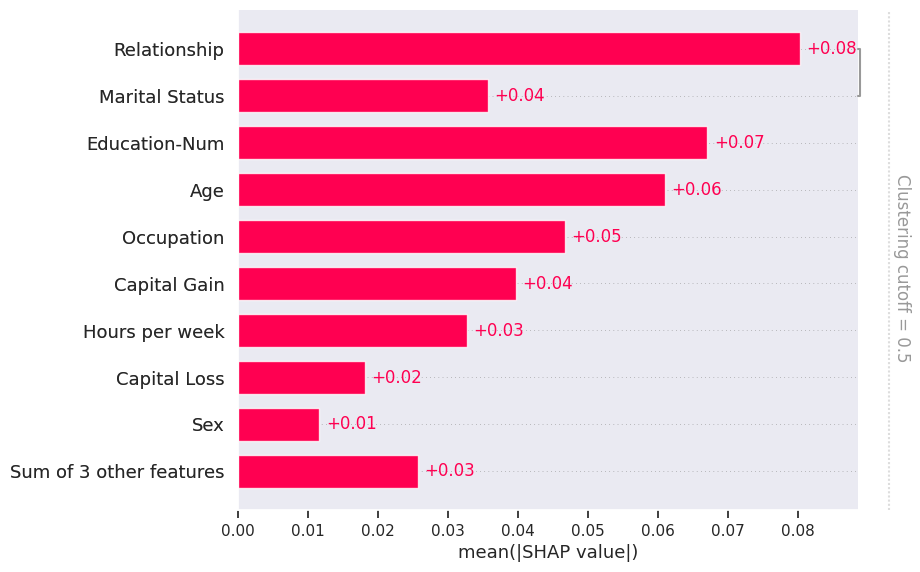

In [ ]:
shap.plots.bar(shap_values2)

Plot a single instance

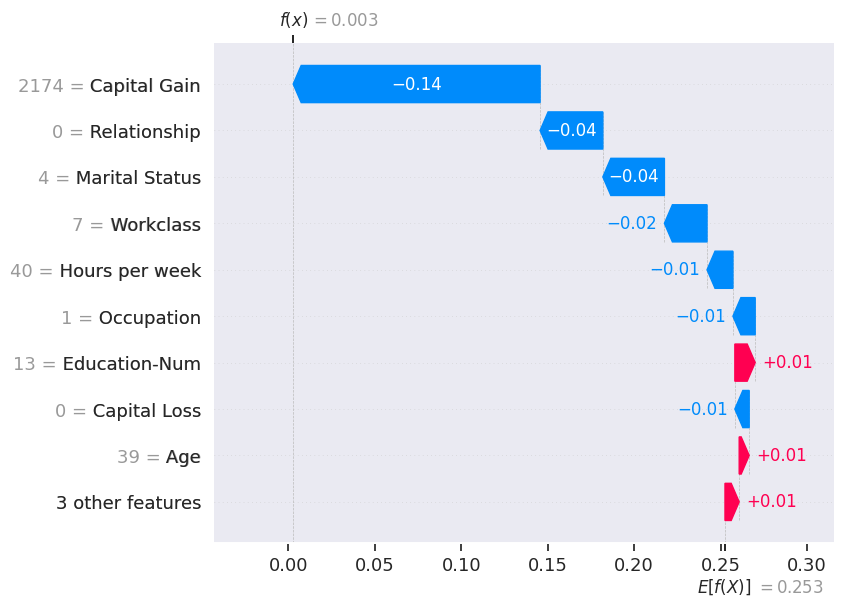

In [ ]:
shap.plots.waterfall(shap_values2[0])

##**The supervised machine learning models (regression) considered to train the dataset in this notebook are:**

* k-Nearest Neighbors Regression

* Linear Regression

* Decision Tree

* Random Forest

* Gradient Boosting

* Multilayer Perceptrons

* XGBoost

* Bagging Regression

* Custom Ensemble: SuperLearner

In [ ]:
#importing required libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

##**k-Nearest Neighbors Regression:**

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). A simple implementation of KNN regression is to calculate the average of the numerical target of the k nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train)
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.339

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 58.223389138958176


Reserving Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.

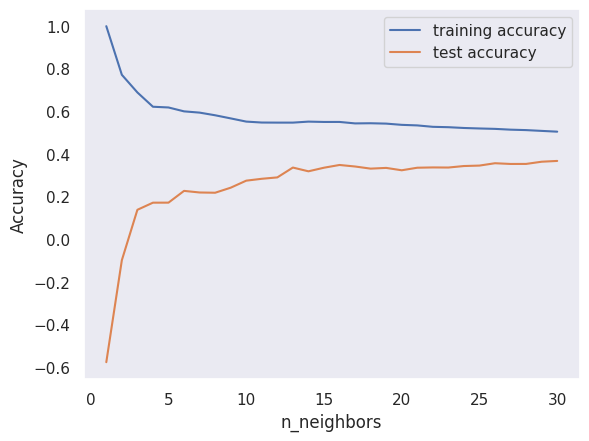

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

OBSERVATIONS: This discrepancy between performance on the training set and the testing set from n_neighbors is a clear sign of overfitting. After that, the perfromance is deprecated, moving on to the other models.

##**Linear Regression**
 Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [ ]:
# Linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.554
Linear Regression: Accuracy on test Data: 0.332

Linear Regression: The RMSE of the training set is: 52.29484581749661
Linear Regression: The RMSE of the testing set is: 58.51717127731562


Reserving Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

OBSERVATIONS: The model's performance is not one of the best, but we can see that the scores on the training and testing sets are very close. This means we are probably underfitting rather than overfitting.

##**Decision Trees: Regression**

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

 In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
# Decision Tree regression model
from sklearn.tree import DecisionTreeRegressor

# instantiate the model
tree = DecisionTreeRegressor(max_depth=9)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.924
Decision Tree: Accuracy on test Data: -0.361

Decision Tree: The RMSE of the training set is: 21.61347642664176
Decision Tree: The RMSE of the testing set is: 83.54234502431427


Reserving Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

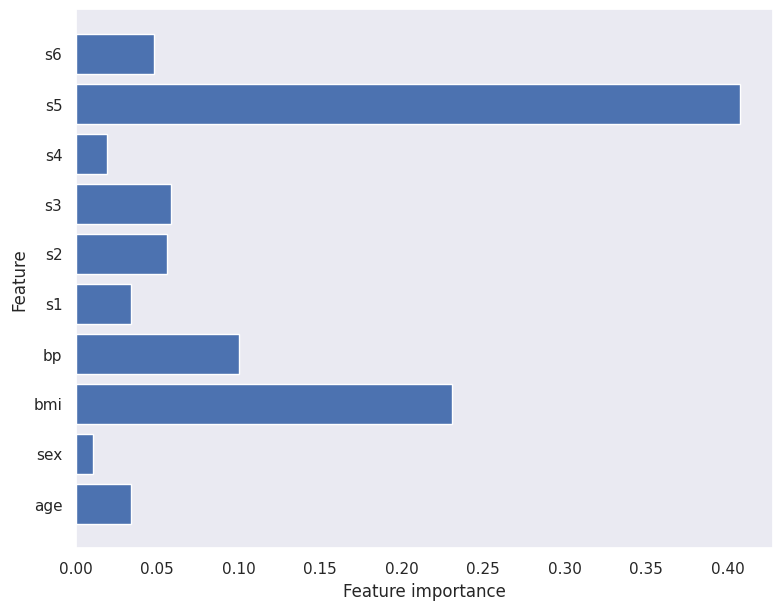

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Evaluating training and testing set performance with different numbers of max_depth from sex 0.00 to S5 0.40. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

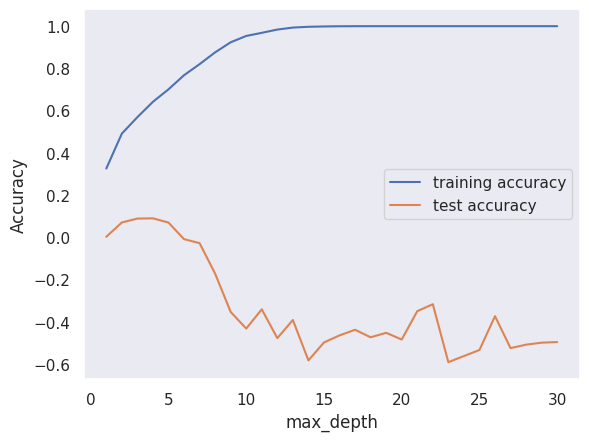

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

OBSERVATIONS: The model preformance is gradually increased on decrease the max_depth parameter. But after max_depth = 9, the model overfits. So the model is considered with max_depth = 8 which has an accuracy of 95.2%.

 ## **Random Forest: Ensemble of Decision Trees**

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

 If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.906
Random Forest: Accuracy on test Data: 0.264

Random Forest: The RMSE of the training set is:  24.06075689307113
Random Forest: The RMSE of the testing set is:  61.444476673817384


Reserving Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

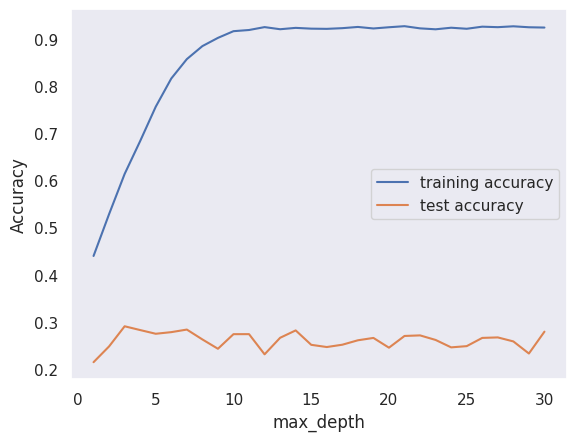

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    forest = RandomForestRegressor(max_depth=n)
    forest.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

 ## **Multilayer Perceptrons (MLPs): Deep Learning**

   Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

   MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model
mlp.fit(X_train, y_train)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor(hidden_layer_sizes=[100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.406
Multilayer Perceptron Regression: Accuracy on test Data: 0.380

Multilayer Perceptron Regression: The RMSE of the training set is:  60.08529300508623
Multilayer Perceptron Regression: The RMSE of the testing set is:  57.318834739960074


Reserving Results:

In [ ]:
#Reserving the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

Observations: The model didnt overfit when trained without tuning any parameters. But, the model accuracy obtained is 89.2%.

So, hyperparameter tuning is performed for the model. The tuned parameters are number of hidden layers and the hidden_units of each layer with default values of alpha. The otimized Gradient Boosted model gives us an accuracy of 92.8%, with parameter tuning.

## **XGBoost Regression:**

 XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

Performance Evaluation:

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have predicted values for the training and test datasets
y_train_predicted_xgb = xgb_model.predict(X_train)
y_test_predicted_xgb = xgb_model.predict(X_test)

# Calculate RMSE for training and test sets
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_predicted_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_predicted_xgb))

# Print the RMSE values
print("XGBoost Regression: RMSE on training Data: {:.3f}".format(rmse_train_xgb))
print("XGBoost Regression: RMSE on test Data: {:.3f}".format(rmse_test_xgb))

XGBoost Regression: RMSE on training Data: 10.937
XGBoost Regression: RMSE on test Data: 64.858


In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.980
XGBoost Regression: Accuracy on test Data: 0.180

XGBoost Regression: The RMSE of the training set is:  10.936988904361716
XGBoost Regression: The RMSE of the testing set is:  64.85763461365538


In [ ]:
#Reserving the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

## **Custom Ensemble - SuperLearner:**

To build a custom ensemble, a Python library called mlens is used. mlens is short of ML-Ensemble used for memory efficient parallelized ensemble learning. ML-Ensemble is a library for building Scikit-learn compatible ensemble estimator. Ensembles are built as a feed-forward network, with a set of layers stacked on each other.

In [ ]:
### You will need mlens package
!pip install mlens

In [ ]:
# Load a sample regression dataset (Diabetes dataset)
data = load_diabetes()
X, y = data.data, data.target

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the meta-model (the model that combines predictions)
meta_model = LinearRegression()

In [ ]:
# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [ ]:
# Fit the stacking model to the training data
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('linear_regression', LinearRegression()),
                              ('decision_tree',
                               DecisionTreeRegressor(max_depth=5)),
                              ('random_forest',
                               RandomForestRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

In [ ]:
# Calculate the RMSE (Root Mean Squared Error) to evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Stacking Regressor RMSE:", rmse)

Stacking Regressor RMSE: 53.16802849995415


In [ ]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from mlens.metrics.metrics import rmse

from sklearn.metrics import accuracy_score

In [ ]:
# --- Build ---
# Passing a scoring function will create cv scores during fitting
#the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=rmse, random_state=555, verbose=2)

# Build the first layer
ensemble.add(mlp)
ensemble.add(knn_grid)
ensemble.add_meta(lr)

In [ ]:
# Fit ensemble
ensemble.fit(X_train, y_train)

In [ ]:
#Predicting the target of samples from the model
y_train_en = ensemble.predict(X_train)
y_test_en = ensemble.predict(X_test)

Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_en = sklearn.metrics.r2_score(y_train,y_train_en)
acc_test_en = sklearn.metrics.r2_score(y_test,y_test_en)

#computing root mean squared error (RMSE)
rmse_train_en = rmse(y_train,y_train_en)
rmse_test_en = rmse(y_test,y_test_en)

print("Custom Ensemble: Accuracy on training Data: {:.3f}".format(acc_train_en))
print("Custom Ensemble: Accuracy on test Data: {:.3f}".format(acc_test_en))
print('\nCustom Ensemble: The RMSE of the training set is: ', rmse_train_en)
print('Custom Ensemble: The RMSE of the testing set is: ', rmse_test_en)

Reserving Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Ensemble_SuperLearner',acc_train_en, acc_test_en, rmse_train_en, rmse_test_en)

# Debate the theory and application of different types of neural networks.

##**Comparision of Models:**

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,k-Nearest Neighbors Regression,1.000,0.339,0.000,58.223
1,Linear Regression,0.554,0.332,52.295,58.517
2,Decision Tree,0.924,-0.361,21.613,83.542
3,Random Forest,0.906,0.264,24.061,61.444
4,Multilayer Perceptron Regression,0.423,0.338,59.463,58.278
5,XGBoost Regression,0.980,0.180,10.937,64.858


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,k-Nearest Neighbors Regression,1.000,0.339,0.000,58.223
4,Multilayer Perceptron Regression,0.423,0.338,59.463,58.278
1,Linear Regression,0.554,0.332,52.295,58.517
3,Random Forest,0.906,0.264,24.061,61.444
5,XGBoost Regression,0.980,0.180,10.937,64.858
2,Decision Tree,0.924,-0.361,21.613,83.542


##**Statistical Tests:**

Statistical tests are used in hypothesis testing. They can be used to:  determine whether a predictor variable has a statistically significant relationship with an outcome variable.
estimate the difference between two or more groups



In [ ]:
#improting required libraries
from scipy import stats

**Teste 1:** Sample t-test to check the difference in suicide rates between
male and female. The hypothesis statements for this test are:

* H0: There is no difference in the suicide rates among male and female (Null).

* H1: There is difference in the suicide rates among male and female (Alternate)

In [ ]:
#collecting male suicide rate data
male = stat_data['suicide_rate'][stat_data['gender'] == 1]
male

In [ ]:
#collecting female suicide rate data
female = stat_data['suicide_rate'][stat_data['gender'] == 0]
female

In [ ]:
#calculating p value
ttest,pval = stats.ttest_rel(male, female)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Test Conclusion:

**Test2:** Finding out whether there is a dependence of suicide rate on the age using the Chi- Square test. The hypothesis statements for this test are:

* H0: Suicide rate and age are independent (Null).

* H1: Suicide rate and age are dependent (Alternate).

In [ ]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.suicide_rate, stat_data.age_group)

In [ ]:
#Significance Level 5%
alpha=0.05

In [ ]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [ ]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

In [ ]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p)
#Here, pvalue = 0.0 and a low pvalue suggests that your sample provides enough evidence that you can reject  H0  for the entire population.

In [ ]:
 #compare chi_square_statistic with critical_value and p-value which is the
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

##**Final Conclusion:**
In this project, learn how to work with different machine learning models on a set of data and understand their parameters. Creating this notebook helped me learn a lot about model parameters, how to tune them, and how they affect model performance. The final conclusion from the suicide dataset is that, regardless of age group and generation, the male population in each country is more likely to commit suicide than the female population.